In [2]:
from keras.datasets import mnist

In [11]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

##Visualizing the dataset

In [6]:
import matplotlib.pyplot as plt

In [8]:
x_train.shape #denoting of images in the dataset - 28 * 28 px 

(60000, 28, 28)

In [22]:
single_image = x_train[56] #training data show 0 index images

In [23]:
single_image #background 0 and number showing images

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 105,
        220, 254,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [24]:
single_image.shape #px shape

(28, 28)

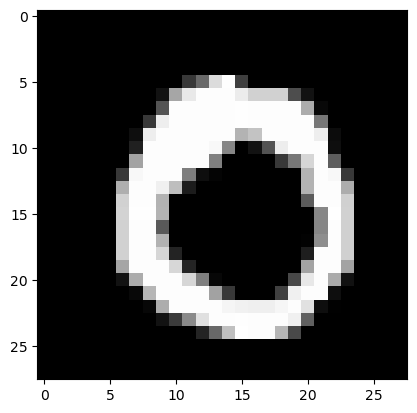

In [25]:
plt.imshow(single_image, cmap='gray')

In [80]:
#Pre-Processing : One label hot enconding 
# It consider regression problem instead of classification problem, that's why we implement hot encoding

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
y_train.shape # 1D array

(60000,)

In [31]:
#apply categorical to reshape the values
y_example = to_categorical(y_train)

In [32]:
y_example #data coming from y_train and it make that number to 1

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
#Problem shape fixed - now 2d array came
y_example.shape

(60000, 10)

In [36]:
y_cat_train = to_categorical(y_train, 10) #No. of classess 10, 

In [37]:
y_cat_test = to_categorical(y_test, 10)

In [39]:
single_image.max()

255

In [40]:
single_image.min()

0

In [41]:
x_train = x_train/255
x_test = x_test/255

In [42]:
scaled_image = x_train[0]

In [44]:
scaled_image.max()

1.0

In [45]:
scaled_image.min()

0.0

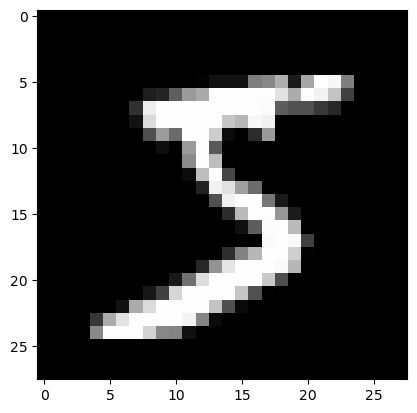

In [82]:
plt.imshow(scaled_image, 'gray') #reduced spread

In [ ]:
#Reshaping dataset 

In [48]:
x_train.shape

(60000, 28, 28)

In [49]:
x_train = x_train.reshape(60000, 28, 28, 1) #we must need to add a value otherwise model train one dimesion array - colorchannel 1

In [50]:
x_train.shape

(60000, 28, 28, 1)

In [51]:
x_test= x_test.reshape(10000, 28, 28, 1) #10k images in test

In [52]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
#Setup Model Architecture

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [76]:
model=Sequential() 

#kernel size mean box,filter 32 is random numbers, input shape already defined we can't change it, for hidden layer relu is good
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation = 'relu')) 

#reduce image retendent data, through applying Max sizes
model.add(MaxPool2D(pool_size=(2,2)))

#Due to this model paramter is reducing
#model.add(Conv2D(filters = 16, kernel_size=(4,4), activation = 'relu'))

model.add(Flatten())

#better to use even 128 number
model.add(Dense(128, activation= 'relu'))

#classification classess = 10 possible outcome ---- for binary classification problem we use sigmoid and our dense layer neuron will be 1
model.add(Dense(10, activation = 'softmax'))


In [77]:
 #loss we'll search research paper, #optimizer mean minimum loss, metrics = accuracy
    #we'll use formula in string
model.compile(loss='categorical_crossentropy',  
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        8208      
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               204928    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
#let's stain our model

In [79]:
model.fit(x_train, y_cat_train, epochs = 2) #accuracy is good

Epoch 1/2
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1334 - accuracy: 0.9589
Epoch 2/2
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0432 - accuracy: 0.9869


In [69]:
model.metrics_names

['loss', 'accuracy']

In [70]:
model.evaluate(x_test, y_cat_test) #test accuracy is good

313/313 [==============================] - 2s 5ms/step - loss: 0.0438 - accuracy: 0.9854


[0.04378689080476761, 0.9854000210762024]

In [ ]:
#train and test accurancy difference called variance

In [71]:
from sklearn.metrics import classification_report

In [72]:
import numpy as np

In [73]:
predections = model.predict(x_test)
predection_classes= np.argmax(predections, axis =1)

313/313 [==============================] - 2s 5ms/step


In [75]:
report = classification_report(y_test, predection_classes)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       1.00      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      1.00      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

